# 物体検出モデル 「YOLOv2」 のインスタンスを生成

In [1]:
from darkflow.net.build import TFNet

tfnet = TFNet({"model": "../darkflow/cfg/yolo.cfg", "load": "../darkflow/yolo.weights", "threshold": 0.1, "gpu": 0.6})

/root/.pyenv/versions/3.6.4/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Parsing ./cfg/yolo.cfg
Parsing ../darkflow/cfg/yolo.cfg
Loading ../darkflow/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.03525352478027344s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76,

# モジュールのインポート

In [2]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import FloatProgress
from IPython.display import display, clear_output

%matplotlib inline

# サンプル1

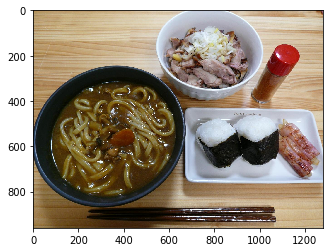

In [7]:
img = cv2.imread("../food-101/sample_images/img_0.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

## ・ 検出

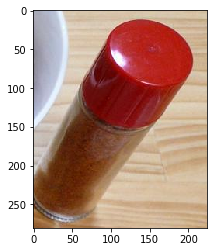

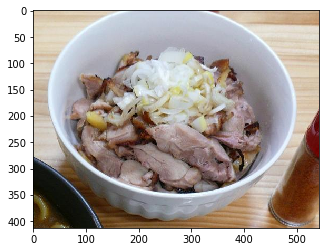

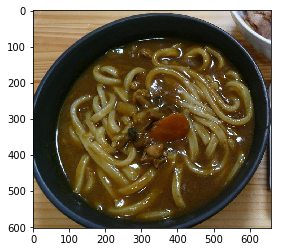

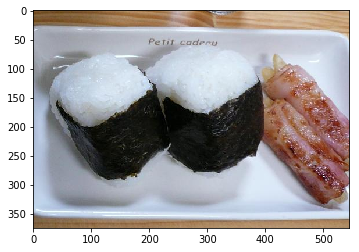

In [8]:
img = cv2.imread("../food-101/sample_images/img_0.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result = tfnet.return_predict(img)
n = 0
for r in result:
    if r['label'] in ['bowl', 'cup']:
        #img = cv2.rectangle(img, (r['topleft']['x'], r['topleft']['y']), (r['bottomright']['x'] , r['bottomright']['y'] ), (255, 0, 0), 5)
        dst = img[r['topleft']['y']:r['bottomright']['y'], r['topleft']['x']:r['bottomright']['x']]

        plt.imshow(dst)
        plt.show()
        dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
        dst = cv2.resize(dst, (346, 260))
        cv2.imwrite("hoge" + str(n) + ".jpg", dst)
        n+=1
#plt.imshow(img)
#plt.show()

# ↑、比較的マシ

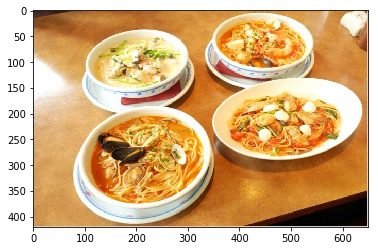

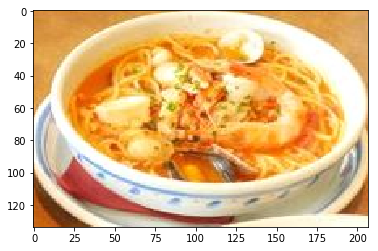

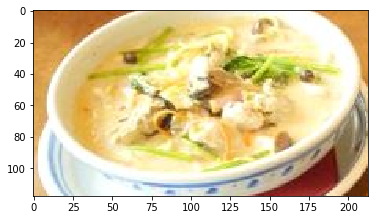

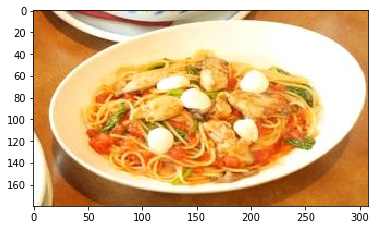

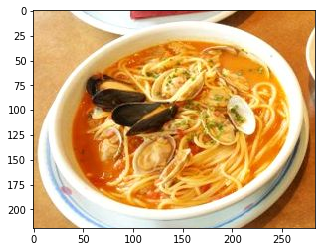

In [35]:
#img = cv2.imread("./sample_img/images.jpeg")
img = cv2.imread("../food-101/sample_images/g.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

result = tfnet.return_predict(img)
n = 0
for r in result:
    if r['label'] in ['bowl']:#, 'cup']:
        #img = cv2.rectangle(img, (r['topleft']['x'], r['topleft']['y']), (r['bottomright']['x'] , r['bottomright']['y'] ), (255, 0, 0), 5)
        dst = img[r['topleft']['y']:r['bottomright']['y'], r['topleft']['x']:r['bottomright']['x']]

        plt.imshow(dst)
        plt.show()
        dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
        dst = cv2.resize(dst, (346, 260))
        cv2.imwrite("hoge" + str(n) + ".jpg", dst)
        n+=1
#plt.imshow(img)
#plt.show()

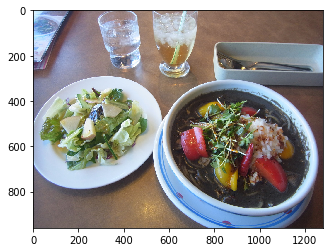

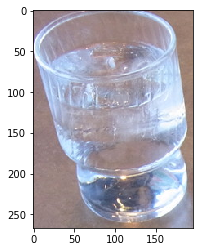

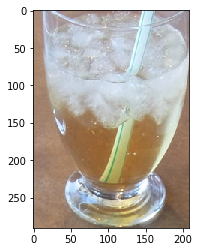

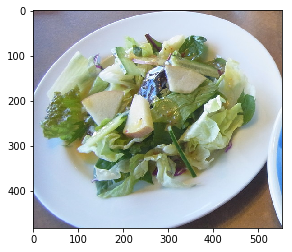

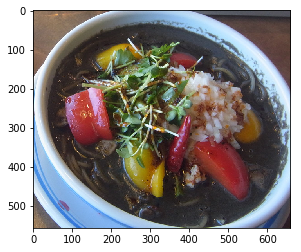

In [58]:
#img = cv2.imread("./sample_img/images.jpeg")
img = cv2.imread("../food-101/sample_images/e.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

result = tfnet.return_predict(img)
n = 0
for r in result:
    if r['label'] in ['bowl', 'cup']:
        #img = cv2.rectangle(img, (r['topleft']['x'], r['topleft']['y']), (r['bottomright']['x'] , r['bottomright']['y'] ), (255, 0, 0), 5)
        dst = img[r['topleft']['y']:r['bottomright']['y'], r['topleft']['x']:r['bottomright']['x']]

        plt.imshow(dst)
        plt.show()
        dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
        dst = cv2.resize(dst, (346, 260))
        cv2.imwrite("hoge" + str(n) + ".jpg", dst)
        n+=1
#plt.imshow(img)
#plt.show()

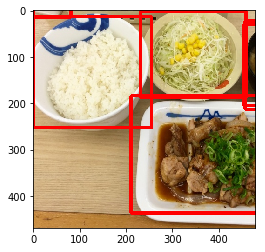

In [9]:
dst = img[r['topleft']['x']:r['bottomright']['x'],r['topleft']['y']:r['bottomright']['y']]

plt.imshow(dst)

#書き出し
#cv2.imwrite('cut.bmp',dst)

# サンプル2

## ・ 動画の読み込み関数

In [3]:
def read(name, resize=False):
    movie = []
    cap = cv2.VideoCapture(name)
    for i in range(1000):
        ret, frame = cap.read()
        if resize:
            frame = cv2.resize(frame, (160, 120))
        movie.append(frame)
        if cv2.waitKey(1) == 27:
            break
    cap.release()
    return np.array(movie)

## ・ 動画の出力関数

In [4]:
def watch(movie, YOLO=False):
    X = movie
    for i in range(40):
        plt.ion()
        fig = plt.figure()
        axe = fig.add_subplot(111)
        clear_output(wait = True)
        if YOLO:
            if i%2 == 0:
                imgcv = X[i]
                result = tfnet.return_predict(imgcv)
                for r in result:
                    if r['label'] in ['bowl', 'cup']:
                        cv2.rectangle(imgcv, (r['topleft']['x'], r['topleft']['y']), (r['bottomright']['x'] , r['bottomright']['y'] ), (0, 0, 255), 2)
                imgcv = cv2.cvtColor(imgcv, cv2.COLOR_RGB2BGR)

            else:
                imgcv = X[i]
                for r in result:
                    if r['label'] in ['bowl', 'cup']:
                        cv2.rectangle(imgcv, (r['topleft']['x'], r['topleft']['y']), (r['bottomright']['x'] , r['bottomright']['y'] ), (0, 0, 255), 2)
                imgcv = cv2.cvtColor(imgcv, cv2.COLOR_RGB2BGR)
        else:
            imgcv = X[i]
            imgcv = cv2.cvtColor(imgcv, cv2.COLOR_RGB2BGR)
        axe.imshow(imgcv)
        fig.set_size_inches(10, 10)
        display(fig)
        fig.clear()

## ・ 動画の読み込み

In [19]:
movie = read("sample_movie/2018-03-09_15-53-20_c.mp4")

## ・ 元動画の出力

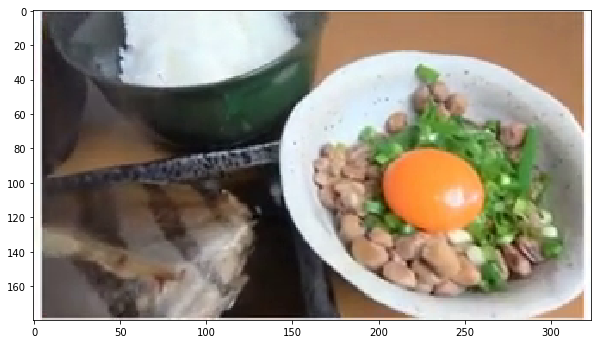

In [6]:
watch(movie)

## ・ リアルタイムで検出

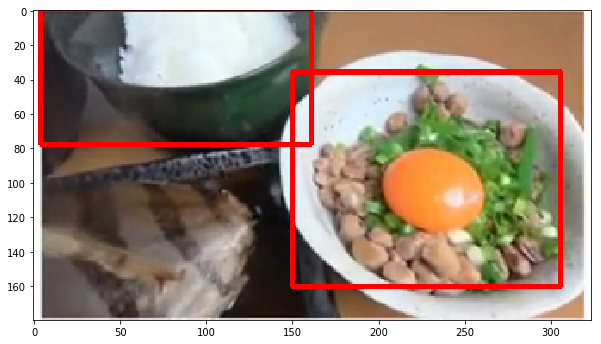

In [20]:
watch(movie, YOLO=True)